In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
#print short Description
data = load_breast_cancer()
print(data.DESCR[:760])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline appr


In [3]:
print(f"Types of cancer (targets) are {data.target_names}")

Types of cancer (targets) are ['malignant' 'benign']


In [4]:
X = data.data  # features
y = data.target  # labels
print(f"Shape of features is {X.shape}, and shape of target is {y.shape}")
print("Targets are: ", y)

Shape of features is (569, 30), and shape of target is (569,)
Targets are:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=42, stratify=y)
y_train[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [6]:
classifier = svm.SVC(kernel='linear', probability=True, verbose=True)

In [7]:
classifier.fit(X_train, y_train)

[LibSVM]................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*...................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

.................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................*......................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

SVC(kernel='linear', probability=True, verbose=True)

In [8]:
y_preds = classifier.predict(X_test)
y_proba = classifier.predict_proba(X_test)
print("Prediction as class - malignanat or benign ", y_preds[:5])
print("Test Data are: ", y_test[:5])
print("Probability of malignant & probability of benign. ", y_proba[:5])

Prediction as class - malignanat or benign  [1 0 1 1 1]
Test Data are:  [1 0 1 1 1]
Probability of malignant & probability of benign.  [[6.43922108e-06 9.99993561e-01]
 [9.45265463e-01 5.47345371e-02]
 [1.62229852e-06 9.99998378e-01]
 [2.20009919e-02 9.77999008e-01]
 [1.31519564e-07 9.99999868e-01]]


In [9]:
y_proba = y_proba[:,1].reshape((y_proba.shape[0],))
print("2D to 1D reshaped Probability of benign. ", y_proba[:5])

2D to 1D reshaped Probability of benign.  [0.99999356 0.05473454 0.99999838 0.97799901 0.99999987]


In [14]:
TN, FP, FN, TP = metrics.confusion_matrix(list(y_test), list(y_preds), labels=[0, 1]).ravel() #0,1 is default label of sklearn 
print("True Negatives", TN)
print("True Positives", TP)
print("False Positives", FP)
print("False Negatives", FN)

sklearnconf = metrics.confusion_matrix(y_test, y_preds)
print("\nsklearn Confusion Matrix is \n", sklearnconf)

conf=metrics.confusion_matrix(y_test, y_preds,labels=[1,0]) #Note to change the labels from the default 0,1 to 1,0
print("Confusion Matrix we want is: \n", conf)

True Negatives 68
True Positives 123
False Positives 7
False Negatives 2

sklearn Confusion Matrix is 
 [[ 68   7]
 [  2 123]]
Confusion Matrix we want is: 
 [[123   2]
 [  7  68]]


In [17]:
results={} #To Store all the metrics Result Values

In [18]:
#Finding Accuracy 
metric = "ACC"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"{metric} is {results[metric]: .3f}") #Note the Formatting with f"{metric} and rounding to 3 decimal points with .3f

ACC is  0.955


In [19]:
#Finding True Negative Rate
metric = "TNR"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

TNR is  0.907


In [20]:
#Finding Precision Predictive Value
metric = "PPV"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

PPV is  0.946


In [27]:
#Finding Negative Predictive Value
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

NPV is  0.971


In [25]:
#Finding True Postive Rate
metric = "TPR"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")


TPR is  0.984


In [26]:
#Finding F1-Score
metric = "F1"
results[metric] = 2 / (1 / results["PPV"] + 1 / results["TPR"])
print(f"{metric} is {results[metric]: .3f}")

F1 is  0.965


In [28]:
#Finding MCC Value
metric = "MCC"
num = TP * TN - FP * FN
den = ((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) ** 0.5
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

MCC is  0.904


In [30]:
#Comparing Our Values to Scikit-Learning Values
print(f"Calculated and scikit-learn Accuracy:                          {results['ACC']: .3f}, {metrics.accuracy_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Precision score:                   {results['PPV']: .3f}, {metrics.precision_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Recall score:                      {results['TPR']: .3f}, {metrics.recall_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn F1 score:                          {results['F1']: .3f}, {metrics.f1_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Matthew's correlation coefficient: {results['MCC']: .3f}, {metrics.matthews_corrcoef(y_test, y_preds): .3f}")

Calculated and scikit-learn Accuracy:                           0.955,  0.955
Calculated and scikit-learn Precision score:                    0.946,  0.946
Calculated and scikit-learn Recall score:                       0.984,  0.984
Calculated and scikit-learn F1 score:                           0.965,  0.965
Calculated and scikit-learn Matthew's correlation coefficient:  0.904,  0.904


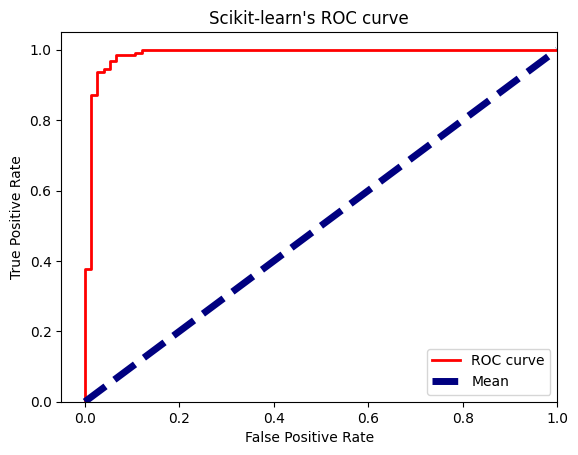

In [35]:
#Plotting AUC and ROC Curve
FPRs, TPRs, _ = metrics.roc_curve(y_test, y_proba)

# Plot the ROC curve
plt.plot(FPRs, TPRs, color='red', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Mean")  #lw  = linewidth
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Scikit-learn's ROC curve")
plt.legend(loc="lower right")
plt.show()

In [36]:
auc_score = metrics.roc_auc_score(y_test, y_proba)
print(f"Scikit's ROC-AUC score of SVC model is {auc_score: .4f}")

Scikit's ROC-AUC score of SVC model is  0.9872
